<a href="https://colab.research.google.com/github/dbwofla11/DeepLearning_Training/blob/master/ANN/FFNN%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1일차 ✈  단일 입력 FFNN 구현하기
* TensorFlow없이 구현하기
* TensorFlow있이 구현하기

# 1. 단일 은닉층 FFNN ( AND 문제 )


In [ ]:
# 단일 은닉층 모델 AND 문제
import numpy as np

def sigmoide(x : float):
  return 1 / (1 + np.exp(-x))

def derivada_sigmoide(x : float):
  return x * (1 - x)

class FFNN:
  def __init__(self , input_Size , hidden_Size , output_Size):
    self.input_Size = input_Size
    self.hidden_Size = hidden_Size
    self.output_Size = output_Size

    # 가중치 초기화
    self.W1 = np.random.randn(self.input_Size , self.hidden_Size) # I -> H
    self.W2 = np.random.randn(self.hidden_Size , self.output_Size) # H -> O

    self.b1 = np.zeros((1 , self.hidden_Size)) # H bias
    self.b2 = np.zeros((1 , self.output_Size)) # O bias

# 포워드와 벡워드만 잘 수식보면서 이해하면 됨 ( 수식대로만 친거임 )
  def forward(self , X):
      self.z1 = np.dot(X , self.W1) + self.b1
      self.a1 = sigmoide(self.z1)

      self.z2 = np.dot(self.a1 , self.W2) + self.b2
      self.a2 = sigmoide(self.z2)

      return self.a2

  def backward(self , X , Y , learning_rate):
      m = X.shape[0] # 샘플 수

      # 출력층 오차
      dZ2 = self.a2 - Y # 예측 - 실제
      dW2 = (1 / m) * np.dot(self.a1.T , dZ2)
      db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

      # 은닉층 오차
      dA1 = np.dot(dZ2 , self.W2.T)
      dZ1 = dA1 * derivada_sigmoide(self.a1)
      dW1 = (1 / m) * np.dot(X.T , dZ1)
      db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

      # 가중치와 편향 업데이트
      self.W1 -= learning_rate * dW1
      self.b1 -= learning_rate * db1
      self.W2 -= learning_rate * dW2
      self.b2 -= learning_rate * db2


  def train(self, X , Y , epochs , learning_rate):
      for epoch in range(epochs):
        self.forward(X)
        self.backward(X , Y , learning_rate)


        if epoch % 100 == 0:
          loss = np.mean(np.square(Y - self.a2))  # MSE (Mean Squared Error) 실제와 예측
          print(f"Epoch {epoch}, Loss: {loss}")


  def predict(self , X):
      return self.forward(X)

# 예시 데이터
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # 입력 데이터 (AND 문제)
Y = np.array([[0], [1], [1], [0]])  # 출력 데이터 (AND 문제에 대한 결과)

# 네트워크 인스턴스 생성 (2개 입력, 4개 은닉층 뉴런, 1개 출력)
input_size = 2
hidden_size = 4
output_size = 1
nn = FFNN(input_size, hidden_size, output_size)

# 모델 학습
nn.train(X, Y, epochs=10000, learning_rate=0.1)

# 예측
predictions = nn.predict(X)
print("\nPredictions:")
print(predictions)

# 1-2. 여러 은닉층 FFNN


In [ ]:
# 내일 할거
# 이거 서술해보고 구현하기
# 활성화 함수 정리 마무리

# 2. Mnist + tensorflow
- 레이어 추가 및 모델 정의 하는법

In [13]:
import tensorflow as tf
import numpy as np

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)  # 28x28 이미지를 784 크기의 벡터로 변환
x_test = x_test.reshape(-1, 784)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) # one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# 모델 정의
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation="relu",input_shape=(784,)))
for _ in range(5): # 너무 많이 추가하면 과적합 발생
  model.add(tf.keras.layers.Dense(128, activation="relu"))
# 출력층 ( sigmoid는 이진 부류여서 안됨 )
model.add(tf.keras.layers.Dense(10, activation="softmax"))


# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=1) # epoch 수 조정 가능

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# 예측
predictions = model.predict(x_test)
print("\nPredictions (first 5):")
print(np.argmax(predictions[:5], axis=1)) # 예측값 중 가장 큰 값의 인덱스 출력



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8610 - loss: 0.4458
Loss: 0.1726
Accuracy: 0.9485
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Predictions (first 5):
[7 2 1 0 4]


# 2-1. vanashing gredient구현하기


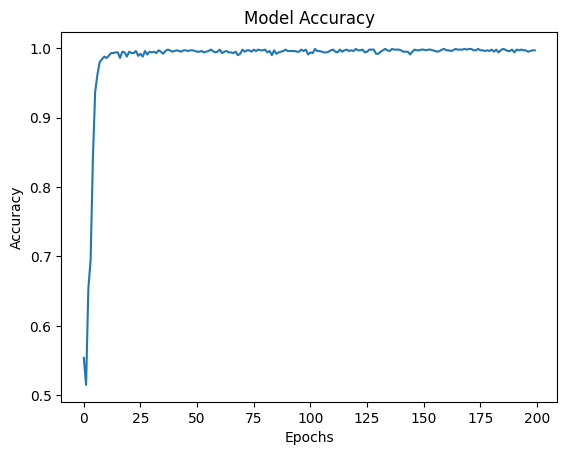

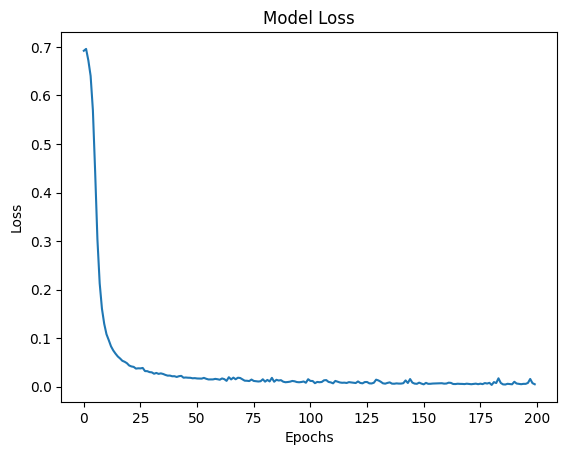

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 생성
x_train = np.random.randn(1000, 1)
y_train = (x_train > 0).astype(int)  # x_train이 양수이면 1, 음수이면 0

# 기울기 소실 문제를 확인할 수 있는 모델 정의 (시그모이드 사용)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_dim=1),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(x_train, y_train, epochs=200, batch_size=32, verbose=0)

# 학습 과정 중 정확도 시각화
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 손실 값 시각화
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


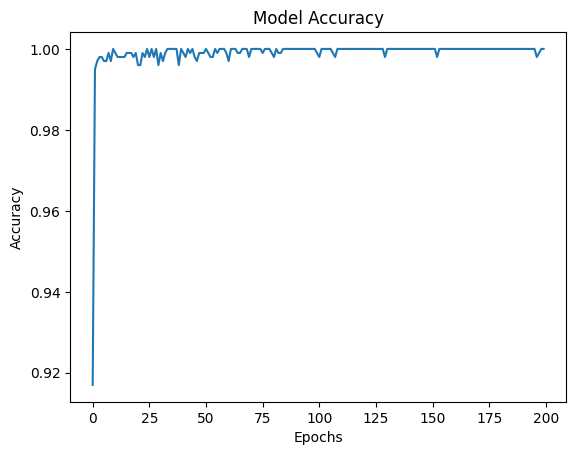

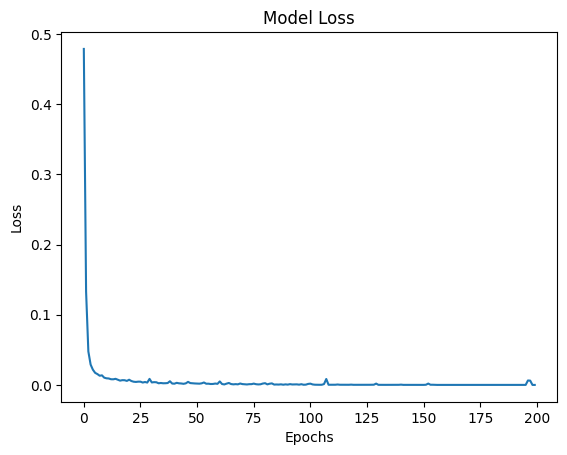

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 생성
x_train = np.random.randn(1000, 1)
y_train = (x_train > 0).astype(int)  # x_train이 양수이면 1, 음수이면 0

# 기울기 소실 문제를 확인할 수 있는 모델 정의 (시그모이드 사용)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(x_train, y_train, epochs=200, batch_size=16, verbose=0)

# 학습 과정 중 정확도 시각화
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 손실 값 시각화
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 음수가 있기에 죽은 뉴런 현상을 볼 수 있다

양수 데이터만 줘서 Relu굴려보기

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


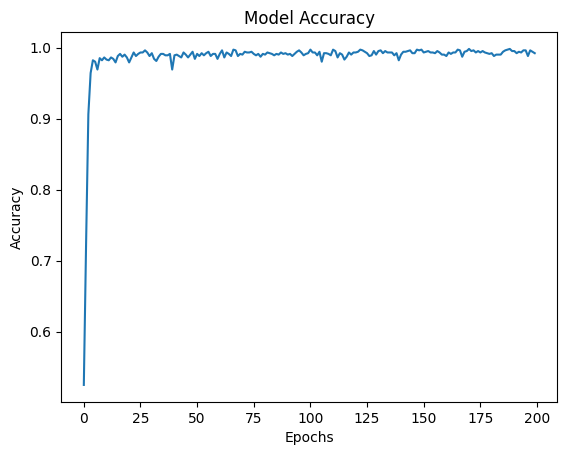

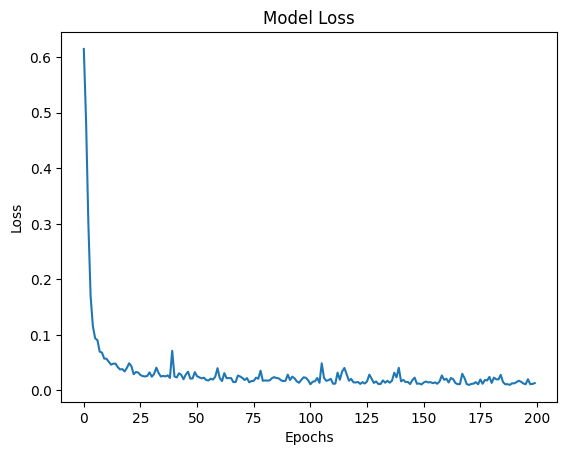

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 생성
x_train = np.random.rand(1000, 1) * 10
y_train = (x_train >= 5).astype(int) # y_train: 5 이상이면 1, 5 미만이면 0

# 기울기 소실 문제를 확인할 수 있는 모델 정의 (시그모이드 사용)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(x_train, y_train, epochs=200, batch_size=16, verbose=0)

# 학습 과정 중 정확도 시각화
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 손실 값 시각화
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# 가끔가다 가중치 업데이트가 과도하게 되어서 기울기가 폭주하는 걸 볼 수 있음
# 의미없는 학습인데 너무 epoch가 많음